In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [3]:
df1.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [5]:
df1.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,27927.000000,24750.000000,28198.000000,27984.000000,28199.000000,28188.000000,28176.000000,28188.000000,2.549300e+04,28200.000000,25837.000000,23097.000000,28199.000000,27628.000000,23107.000000,28200.000000,27657.000000,27993.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,65.027857,5.318506e+04,32.735091,20.799761,306.888883,1575.560011,25.849894,2.254034,0.397249,25.887052,6.130529
std,76.275645,44.278534,27.204430,47.918161,43.663605,6.124546,827.205537,19.816499,1.875036e+05,7.703391,54.356431,134.055900,483.326394,32.423943,11.275602,0.061158,7.773609,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883502,7.948900,41.633238,-1.197652,40.557952,41.911365,870.340239,41.198509,1.679492e+04,27.311644,40.448386,238.627752,1268.134043,13.722808,2.544859,0.347445,24.447658,4.059505
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,3.453333,0.398591,25.957739,5.764710
75%,95.268058,23.687285,45.673685,5.495030,45.879425,45.174246,2462.585729,78.945849,1.181133e+05,38.232387,44.494543,404.153517,1829.054007,41.550520,4.357862,0.449354,27.477854,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


In [6]:
df2.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tracking_id                    12086 non-null  object 
 1   datetime                       12086 non-null  object 
 2   wind_speed(m/s)                11960 non-null  float64
 3   atmospheric_temperature(°C)    10659 non-null  float64
 4   shaft_temperature(°C)          12085 non-null  float64
 5   blades_angle(°)                11980 non-null  float64
 6   gearbox_temperature(°C)        12085 non-null  float64
 7   engine_temperature(°C)         12081 non-null  float64
 8   motor_torque(N-m)              12075 non-null  float64
 9   generator_temperature(°C)      12081 non-null  float64
 10  atmospheric_pressure(Pascal)   10935 non-null  float64
 11  area_temperature(°C)           12085 non-null  float64
 12  windmill_body_temperature(°C)  11160 non-null 

In [8]:
df2.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m)
count,11960.000000,10659.000000,12085.000000,11980.000000,12085.000000,12081.000000,12075.000000,12081.000000,1.093500e+04,12085.000000,11160.000000,9926.000000,12086.000000,11805.000000,9972.000000,12086.000000,11831.000000
mean,69.381862,0.687445,39.936571,-9.218509,40.318639,42.604738,1717.343991,65.237894,5.428332e+04,32.796168,20.906469,308.376140,1581.289398,26.566581,2.201328,0.397527,25.963743
std,76.119487,44.051104,27.114499,47.574365,42.481822,6.215124,829.809203,19.868135,1.872562e+05,7.671919,53.291337,133.923293,483.125121,32.103827,11.513251,0.061661,7.716063
min,-525.530600,-99.000000,-99.000000,-99.000000,-185.860883,-5.000000,500.000000,30.000000,-1.207259e+06,-30.000000,-99.000000,0.000000,-1654.449587,-182.169613,-99.000000,0.200009,-21.215639
25%,21.809823,8.118199,41.635406,-1.191777,40.460379,41.925716,874.238660,41.283334,1.679650e+04,27.406656,40.366937,238.782318,1272.310773,13.760163,2.520990,0.346909,24.452970
50%,93.338083,16.177184,43.707769,-0.497108,43.219752,43.553196,2032.285162,70.797759,1.820142e+04,32.658467,42.788389,272.047526,1680.225602,33.090562,3.434327,0.399637,25.950314
75%,95.251808,23.855116,45.756032,6.232264,45.840152,45.228475,2480.423058,79.432294,1.183212e+05,38.302814,44.506596,408.668722,1837.302026,41.976934,4.342784,0.450488,27.490102
max,525.434211,80.442232,183.299983,170.047823,563.000000,49.858945,2997.013769,99.571599,1.127571e+06,53.927698,191.979747,570.857751,4106.196001,213.260076,17.847936,0.499985,77.604969


In [9]:
# sb.pairplot(df1)

<AxesSubplot:>

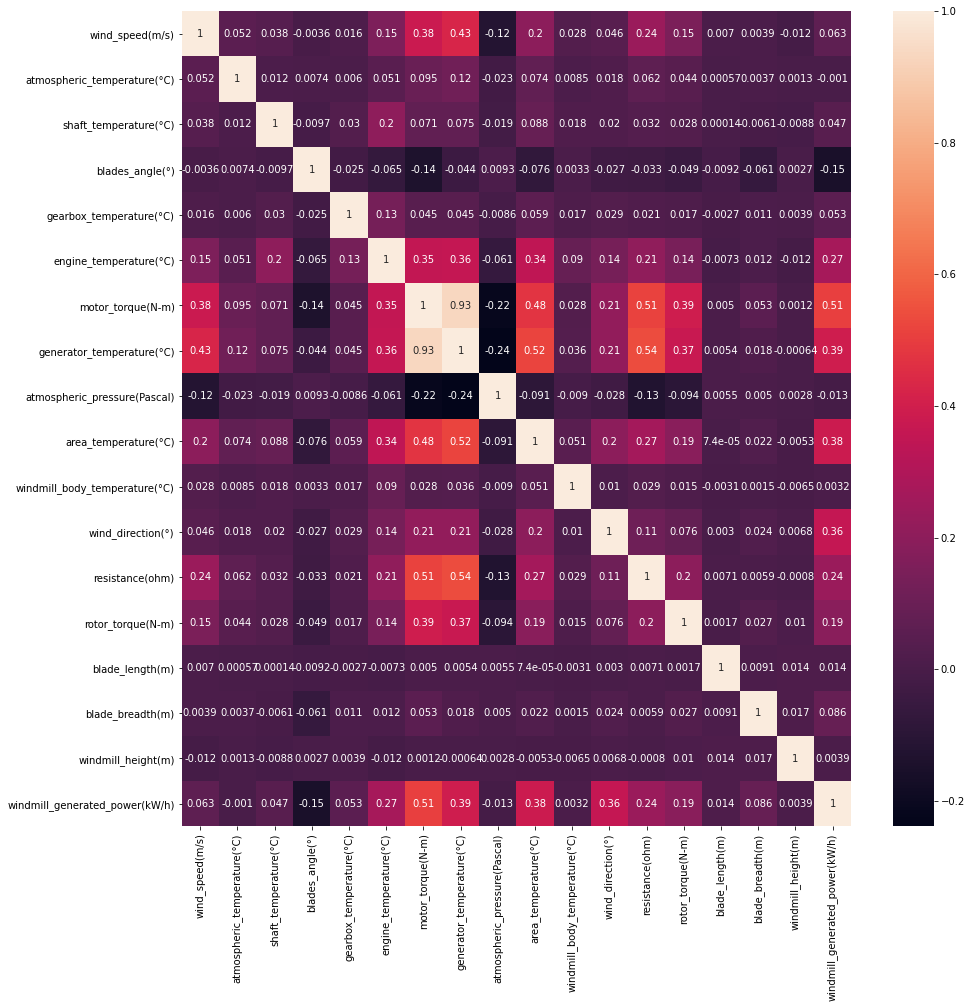

In [10]:
corr_matrix = df1.corr()
plt.figure(figsize=(15,15))
sb.heatmap(corr_matrix, annot=True)

In [11]:
corr_matrix['windmill_generated_power(kW/h)'].sort_values(ascending=False)

windmill_generated_power(kW/h)    1.000000
motor_torque(N-m)                 0.505553
generator_temperature(°C)         0.391820
area_temperature(°C)              0.384564
wind_direction(°)                 0.359647
engine_temperature(°C)            0.272597
resistance(ohm)                   0.240045
rotor_torque(N-m)                 0.187476
blade_breadth(m)                  0.085886
wind_speed(m/s)                   0.062754
gearbox_temperature(°C)           0.053192
shaft_temperature(°C)             0.046552
blade_length(m)                   0.014294
windmill_height(m)                0.003909
windmill_body_temperature(°C)     0.003196
atmospheric_temperature(°C)      -0.001005
atmospheric_pressure(Pascal)     -0.013310
blades_angle(°)                  -0.154808
Name: windmill_generated_power(kW/h), dtype: float64

# Reduce columns and seperate necessary columns

In [12]:
df1['blade_area'] = df1['blade_length(m)'] * df1['blade_breadth(m)']
df2['blade_area'] = df2['blade_length(m)'] * df2['blade_breadth(m)']


In [13]:
del df1['blade_length(m)']
del df1['blade_breadth(m)']
del df2['blade_length(m)']
del df2['blade_breadth(m)']

# Attribute Manipulation

In [14]:
# cloud level
df1['cloud_level'].value_counts()
df1['cloud_level'] = df1['cloud_level'].replace({'Extremely Low': 0, 'Low': 1, 'Medium': 2})

df2['cloud_level'].value_counts()
df2['cloud_level'] = df2['cloud_level'].replace({'Extremely Low': 0, 'Low': 1, 'Medium': 2})

In [15]:
#turbine_Status
df1['turbine_status'].unique()
df1['turbine_status'] = df1['turbine_status'].replace({'BA':0,'A2':1,'ABC':2,'AAA':3,'BD':4,'AC':5,'BB':6,'BCB':7,'B':8,'AB':9,'B2':10,'BBB':11,'A':12,'D':13}).astype(float)
#print(df1['turbine_status'].value_counts())

df2['turbine_status'].unique()
df2['turbine_status'] = df2['turbine_status'].replace({'BA':0,'A2':1,'ABC':2,'AAA':3,'BD':4,'AC':5,'BB':6,'BCB':7,'B':8,'AB':9,'B2':10,'BBB':11,'A':12,'D':13}).astype(float)
#df2['turbine_status'].value_counts()

In [16]:
df1['datetime']=df1['datetime'].astype(str)
df1['month']=df1['datetime'].str.slice(5,7)
df1['time']=df1['datetime'].str.slice(11,13)

df2['datetime']=df1['datetime'].astype(str)
df2['month']=df1['datetime'].str.slice(5,7)
df2['time']=df1['datetime'].str.slice(11,13)

df1['month']
df1['time']

0        14
1        10
2        14
3        15
4        03
         ..
28195    02
28196    12
28197    02
28198    19
28199    11
Name: time, Length: 28200, dtype: object

In [17]:
del df1['datetime']
del df2['datetime']

In [18]:
pattern = ['|'.join(['00','01','02']),'|'.join(['03','04','05']),'|'.join(['06','07','08']),'|'.join(['09','10','11']),
           '|'.join(['12','13','14']),'|'.join(['15','16','17']),'|'.join(['18','19','20']),'|'.join(['21','22','23'])]
k = ['1','2','3','4','5','6','7','8']
for i in range(8):
    df1['time']=df1['time'].str.replace(pattern[i],k[i])
    df2['time']=df1['time'].str.replace(pattern[i],k[i])

df1['time'].value_counts()
df2['time'].value_counts()

<ipython-input-18-ab5d0c78a5cf>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['time']=df1['time'].str.replace(pattern[i],k[i])
<ipython-input-18-ab5d0c78a5cf>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['time']=df1['time'].str.replace(pattern[i],k[i])


4    1548
7    1538
8    1532
6    1522
1    1518
5    1510
2    1474
3    1444
Name: time, dtype: int64

Deleting those attributes whose correlation was near to 0 or not significant

In [19]:
del df1['tracking_id']
del df1['windmill_body_temperature(°C)']
del df1['windmill_height(m)']

del df2['tracking_id']
del df2['windmill_body_temperature(°C)']
del df2['windmill_height(m)']

# MISSING VALUES

In [20]:
print(df1.isnull().sum())
df2.isnull().sum()

wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
windmill_generated_power(kW/h)     207
blade_area                        5093
month                                0
time                                 0
dtype: int64


wind_speed(m/s)                  126
atmospheric_temperature(°C)     1427
shaft_temperature(°C)              1
blades_angle(°)                  106
gearbox_temperature(°C)            1
engine_temperature(°C)             5
motor_torque(N-m)                 11
generator_temperature(°C)          5
atmospheric_pressure(Pascal)    1151
area_temperature(°C)               1
wind_direction(°)               2160
resistance(ohm)                    0
rotor_torque(N-m)                281
turbine_status                   797
cloud_level                      125
blade_area                      2114
month                              0
time                               0
dtype: int64

In [21]:
28200 - df1['shaft_temperature(°C)'].count()           # 2 # mean method can be used
28200 - df1['gearbox_temperature(°C)'].count()         # 1 # mean method can be used
28200 - df1['engine_temperature(°C)'].count()          # 12 # mean method can be used
28200 - df1['motor_torque(N-m)'].count()               # 24 # high positive correlation
28200 - df1['generator_temperature(°C)'].count()       # 12 # second high positive correlation 
28200 - df1['resistance(ohm)'].count()                 # 1 # backfill method can be used

12086 - df2['shaft_temperature(°C)'].count()            # 1 # mean method can be used
12086 - df2['gearbox_temperature(°C)'].count()          # 1 # mean method can be used
12086 - df2['engine_temperature(°C)'].count()           # 5 # mean method can be used
12086 - df2['motor_torque(N-m)'].count()                # 11 # high positive correlation
12086 - df2['generator_temperature(°C)'].count()        # 5 # second high positive correlation 
12086 - df2['area_temperature(°C)'].count()             # 1 # backfill method can be used

1

# shaft_temperature(°C)

In [22]:
mean_shaft_temperature_df1 = df1["shaft_temperature(°C)"].mean()
df1["shaft_temperature(°C)"].fillna(value = mean_shaft_temperature_df1, inplace = True)
print(df1["shaft_temperature(°C)"].count())

mean_shaft_temperature_df2 = df2["shaft_temperature(°C)"].mean()
df2["shaft_temperature(°C)"].fillna(value = mean_shaft_temperature_df2, inplace = True)
df2["shaft_temperature(°C)"].count()

28200


12086

# gearbox_temperature(°C)

In [23]:
mean_gearbox_temperature_df1 = df1["gearbox_temperature(°C)"].mean()
df1["gearbox_temperature(°C)"].fillna(value = mean_gearbox_temperature_df1, inplace = True)
print(df1["gearbox_temperature(°C)"].count())

mean_gearbox_temperature_df2 = df2["gearbox_temperature(°C)"].mean()
df2["gearbox_temperature(°C)"].fillna(value = mean_gearbox_temperature_df2, inplace = True)
df2["gearbox_temperature(°C)"].count()

28200


12086

# engine_temperature(°C)


In [24]:
mean_engine_temperature_df1 = df1["engine_temperature(°C)"].mean()
df1["engine_temperature(°C)"].fillna(value = mean_engine_temperature_df1, inplace = True)
print(df1["engine_temperature(°C)"].count())

mean_engine_temperature_df2 = df2["engine_temperature(°C)"].mean()
df2["engine_temperature(°C)"].fillna(value = mean_engine_temperature_df2, inplace = True)
df2["engine_temperature(°C)"].count()

28200


12086

# motor_torque(N-m)

In [25]:
mean_motor_torque_df1 = df1["motor_torque(N-m)"].mean()
df1["motor_torque(N-m)"].fillna(value = mean_motor_torque_df1, inplace = True)
print(df1["motor_torque(N-m)"].count())

mean_motor_torque_df2 = df2["motor_torque(N-m)"].mean()
df2["motor_torque(N-m)"].fillna(value = mean_motor_torque_df2, inplace = True)
df2["motor_torque(N-m)"].count()

28200


12086

# generator_temperature(°C)

In [26]:
mean_generator_temperature_df1 = df1["generator_temperature(°C)"].mean()
df1["generator_temperature(°C)"].fillna(value = mean_generator_temperature_df1, inplace = True)
print(df1["generator_temperature(°C)"].count())

mean_generator_temperature_df2 = df2["generator_temperature(°C)"].mean()
df2["generator_temperature(°C)"].fillna(value = mean_generator_temperature_df2, inplace = True)
df2["generator_temperature(°C)"].count()

28200


12086

# resistance(ohm) df1, area_temperature(°C) df2

In [27]:
df1['resistance(ohm)'].fillna(method='bfill', inplace=True)
df2['area_temperature(°C)'].fillna(method='bfill', inplace=True)
df1['resistance(ohm)'].count()
df2['area_temperature(°C)'].count()

12086

# cloud_level 

In [28]:
# reason why we use [0]  https://stackoverflow.com/questions/42789324/pandas-fillna-mode
df1["cloud_level"].fillna(df1["cloud_level"].mode()[0], inplace = True)
print(df1["cloud_level"].count())

df2["cloud_level"].fillna(df2["cloud_level"].mode()[0], inplace = True)
print(df2["cloud_level"].count())

28200
12086


# Filling missing values with group by method

# wind_speed(m/s) 

In [29]:
#df1
g1 = df1.groupby(by=['time','month'])
s1 = g1['wind_speed(m/s)'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
i=0
for n,v in g1:
    df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'wind_speed(m/s)'] = df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'wind_speed(m/s)'].fillna(s1[i])
    i+=1
print(df1['wind_speed(m/s)'].count())

#df2
g2 = df2.groupby(by=['time','month'])
s2 = g2['wind_speed(m/s)'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
j=0
for n,v in g2:
    df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'wind_speed(m/s)'] = df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'wind_speed(m/s)'].fillna(s2[j])
    j+=1
print(df2['wind_speed(m/s)'].count())


28200
12086


# turbine_status

In [30]:
#df1
g1 = df1.groupby(by=['time','month'])
s1 = g1['turbine_status'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
i=0
for n,v in g1:
    df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'turbine_status'] = df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'turbine_status'].fillna(s1[i])
    i+=1
print(df1['turbine_status'].count())

#df2
g2 = df2.groupby(by=['time','month'])
s2 = g2['turbine_status'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
j=0
for n,v in g2:
    df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'turbine_status'] = df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'turbine_status'].fillna(s2[j])
    j+=1
print(df2['turbine_status'].count())


28200
12086


# atmospheric_temperature(°C)

In [31]:
#df1
g1 = df1.groupby(by=['time','month'])
s1 = g1['atmospheric_temperature(°C)'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
i=0
for n,v in g1:
    df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'atmospheric_temperature(°C)'] = df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'atmospheric_temperature(°C)'].fillna(s1[i])
    i+=1
print(df1['atmospheric_temperature(°C)'].count())

#df2
g2 = df2.groupby(by=['time','month'])
s2 = g2['atmospheric_temperature(°C)'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
j=0
for n,v in g2:
    df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'atmospheric_temperature(°C)'] = df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'atmospheric_temperature(°C)'].fillna(s2[j])
    j+=1
print(df2['atmospheric_temperature(°C)'].count())


28200
12086


# blades_angle(°)

In [32]:
#df1
g1 = df1.groupby(by=['time','month'])
s1 = g1['blades_angle(°)'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
i=0
for n,v in g1:
    df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'blades_angle(°)'] = df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'blades_angle(°)'].fillna(s1[i])
    i+=1
print(df1['blades_angle(°)'].count())

#df2
g2 = df2.groupby(by=['time','month'])
s2 = g2['atmospheric_temperature(°C)'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
j=0
for n,v in g2:
    df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'blades_angle(°)'] = df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'blades_angle(°)'].fillna(s2[j])
    j+=1
print(df2['blades_angle(°)'].count())


28200
12086


# atmospheric_pressure(Pascal)

In [33]:
#df1
g1 = df1.groupby(by=['time','month'])
s1 = g1['atmospheric_pressure(Pascal)'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
i=0
for n,v in g1:
    df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'atmospheric_pressure(Pascal)'] = df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'atmospheric_pressure(Pascal)'].fillna(s1[i])
    i+=1
print(df1['atmospheric_pressure(Pascal)'].count())

#df2
g2 = df2.groupby(by=['time','month'])
s2 = g2['atmospheric_pressure(Pascal)'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
j=0
for n,v in g2:
    df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'atmospheric_pressure(Pascal)'] = df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'atmospheric_pressure(Pascal)'].fillna(s2[j])
    j+=1
print(df2['atmospheric_pressure(Pascal)'].count())


28200
12086


# wind_direction(°)

In [34]:
#df1
g1 = df1.groupby(by=['time','month'])
s1 = g1['wind_direction(°)'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
i=0
for n,v in g1:
    df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'wind_direction(°)'] = df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'wind_direction(°)'].fillna(s1[i])
    i+=1
print(df1['wind_direction(°)'].count())

#df2
g2 = df2.groupby(by=['time','month'])
s2 = g2['wind_direction(°)'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
j=0
for n,v in g2:
    df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'wind_direction(°)'] = df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'wind_direction(°)'].fillna(s2[j])
    j+=1
print(df2['wind_direction(°)'].count())


28200
12086


# rotor_torque(N-m)

In [35]:
#df1
g1 = df1.groupby(by=['time','month'])
s1 = g1['rotor_torque(N-m)'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
i=0
for n,v in g1:
    df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'rotor_torque(N-m)'] = df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'rotor_torque(N-m)'].fillna(s1[i])
    i+=1
print(df1['rotor_torque(N-m)'].count())

#df2
g2 = df2.groupby(by=['time','month'])
s2 = g2['rotor_torque(N-m)'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
j=0
for n,v in g2:
    df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'rotor_torque(N-m)'] = df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'rotor_torque(N-m)'].fillna(s2[j])
    j+=1
print(df2['rotor_torque(N-m)'].count())


28200
12086


# blade_area

In [36]:
#df1
g1 = df1.groupby(by=['time','month'])
s1 = g1['blade_area'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
i=0
for n,v in g1:
    df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'blade_area'] = df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'blade_area'].fillna(s1[i])
    i+=1
print(df1['blade_area'].count())

#df2
g2 = df2.groupby(by=['time','month'])
s2 = g2['blade_area'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
j=0
for n,v in g2:
    df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'blade_area'] = df2.loc[(df2['time']==n[0]) & (df2['month']==n[1]), 'blade_area'].fillna(s2[j])
    j+=1
print(df2['blade_area'].count())


28200
12086


# windmill_generated_power(kW/h)

In [37]:
#df1
g1 = df1.groupby(by=['time','month'])
s1 = g1['windmill_generated_power(kW/h)'].agg(np.mean).values     #here .values function used to convert series s into numpy(list)
i=0
for n,v in g1:
    df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'windmill_generated_power(kW/h)'] = df1.loc[(df1['time']==n[0]) & (df1['month']==n[1]), 'windmill_generated_power(kW/h)'].fillna(s1[i])
    i+=1
print(df1['windmill_generated_power(kW/h)'].count())

28200


In [38]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 28200 non-null  float64
 1   atmospheric_temperature(°C)     28200 non-null  float64
 2   shaft_temperature(°C)           28200 non-null  float64
 3   blades_angle(°)                 28200 non-null  float64
 4   gearbox_temperature(°C)         28200 non-null  float64
 5   engine_temperature(°C)          28200 non-null  float64
 6   motor_torque(N-m)               28200 non-null  float64
 7   generator_temperature(°C)       28200 non-null  float64
 8   atmospheric_pressure(Pascal)    28200 non-null  float64
 9   area_temperature(°C)            28200 non-null  float64
 10  wind_direction(°)               28200 non-null  float64
 11  resistance(ohm)                 28200 non-null  float64
 12  rotor_torque(N-m)               

In [39]:
df=pd.concat([df1,df2],ignore_index=True)
df1=df.iloc[:28200,:]
df2=df.iloc[28200:,:]
df2=df2.reset_index(drop=True)
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 28200 non-null  float64
 1   atmospheric_temperature(°C)     28200 non-null  float64
 2   shaft_temperature(°C)           28200 non-null  float64
 3   blades_angle(°)                 28200 non-null  float64
 4   gearbox_temperature(°C)         28200 non-null  float64
 5   engine_temperature(°C)          28200 non-null  float64
 6   motor_torque(N-m)               28200 non-null  float64
 7   generator_temperature(°C)       28200 non-null  float64
 8   atmospheric_pressure(Pascal)    28200 non-null  float64
 9   area_temperature(°C)            28200 non-null  float64
 10  wind_direction(°)               28200 non-null  float64
 11  resistance(ohm)                 28200 non-null  float64
 12  rotor_torque(N-m)               

# Training model

In [42]:
x_train=df1.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,16]]
y_train=df1.iloc[:,15]

x_test=df2.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,16]]

# Selecting a model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model = LinearRegression()
model.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
prediction_test = model.predict(x_test)
print(prediction_test[0:5])

[2.60548518 2.49250229 3.43149315 6.01653618 3.40039482]


In [45]:
prediction_train = model.predict(x_train)
print(prediction_train[0:5],y_train[0:5])

[ 7.2049549   6.03299889  2.92027989 14.65550924  3.44330306] 0     6.766521
1     5.966275
2     2.874342
3    14.851089
4     3.519074
Name: windmill_generated_power(kW/h), dtype: float64


In [46]:
model.score(x_train,y_train)

0.993896268902856

# Saving the model

In [47]:
from joblib import dump, load
dump(model, 'power_generation.joblib')

['power_generation.joblib']